In [656]:
import pandas as pd
import numpy as np
from datetime import datetime, date, time
import seaborn as sns

In [657]:
data_location= "dataset_SCL.csv"
data= pd.read_csv(data_location,  sep=",")

C:\Users\Javiera\anaconda3\envs\dhdsblend2021\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (1,6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [658]:
data.sample(5)

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
10965,2017-02-13 08:30:00,750,SCEL,SBGR,LAN,2017-02-13 08:27:00,750,SCEL,SBGR,LAN,13,2,2017,Lunes,I,Grupo LATAM,Santiago,Sao Paulo
1384,2017-01-02 19:20:00,25,SCEL,SCTE,SKU,2017-01-02 19:17:00,25,SCEL,SCTE,SKU,2,1,2017,Lunes,N,Sky Airline,Santiago,Puerto Montt
26550,2017-05-27 21:25:00,502,SCEL,KMIA,LAN,2017-05-27 21:27:00,502,SCEL,KMIA,LAN,27,5,2017,Sabado,I,Grupo LATAM,Santiago,Miami
39724,2017-08-23 13:00:00,13,SCEL,SCTE,SKU,2017-08-23 13:05:00,13,SCEL,SCTE,SKU,23,8,2017,Miercoles,N,Sky Airline,Santiago,Puerto Montt
32397,2017-07-07 20:00:00,912,SCEL,KMIA,AAL,2017-07-07 20:04:00,912,SCEL,KMIA,AAL,7,7,2017,Viernes,I,American Airlines,Santiago,Miami


## Siglas
Fecha-I : Fecha y hora programada del vuelo.  
Vlo-I : Número de vuelo programado.  
Ori-I : Código de ciudad de origen programado.  
Des-I : Código de ciudad de destino programado.  
Emp-I : Código aerolínea de vuelo programado.  
Fecha-O : Fecha y hora de operación del vuelo.  
Vlo-O : Número de vuelo de operación del vuelo.  
Ori-O : Código de ciudad de origen de operación  
Des-O : Código de ciudad de destino de operación.  
Emp-O : Código aerolínea de vuelo operado.  
DIA : Día del mes de operación del vuelo.  
MES : Número de mes de operación del vuelo.  
AÑO : Año de operación del vuelo.  
DIANOM : Día de la semana de operación del vuelo.  
TIPOVUELO : Tipo de vuelo, I =Internacional, N =Nacional.  
OPERA : Nombre de aerolínea que opera.  
SIGLAORI : Nombre ciudad origen.  
SIGLADES : Nombre ciudad destino  

In [659]:
data.shape

(68206, 18)

In [660]:
data.isnull().sum()

Fecha-I      0
Vlo-I        0
Ori-I        0
Des-I        0
Emp-I        0
Fecha-O      0
Vlo-O        1
Ori-O        0
Des-O        0
Emp-O        0
DIA          0
MES          0
AÑO          0
DIANOM       0
TIPOVUELO    0
OPERA        0
SIGLAORI     0
SIGLADES     0
dtype: int64

In [661]:
data.dtypes

Fecha-I      object
Vlo-I        object
Ori-I        object
Des-I        object
Emp-I        object
Fecha-O      object
Vlo-O        object
Ori-O        object
Des-O        object
Emp-O        object
DIA           int64
MES           int64
AÑO           int64
DIANOM       object
TIPOVUELO    object
OPERA        object
SIGLAORI     object
SIGLADES     object
dtype: object

In [662]:
data.describe()

,DIA,MES,AÑO
count,68206.000000,68206.000000,68206.000000
mean,15.714790,6.622585,2017.000029
std,8.782886,3.523321,0.005415
min,1.000000,1.000000,2017.000000
25%,8.000000,3.000000,2017.000000
50%,16.000000,7.000000,2017.000000
75%,23.000000,10.000000,2017.000000
max,31.000000,12.000000,2018.000000


In [663]:
(data["Ori-I"] == data["Ori-O"]).value_counts()

True    68206
dtype: int64

In [664]:
# Siempre salen de la ciudad de origen programada, por tanto eliminaremos ori-o, ya que no aporta valor en la información


In [665]:
(data['Vlo-I'] == data['Vlo-O']).value_counts()/data.shape[0]

True     0.972876
False    0.027124
dtype: float64

In [666]:
# Se observa que el numero de vuelo es distinto un 2% de las veces.
#El numero de vuelo en si no aporta información, pero si las veces que este es distinto puede afectar en que un vuelo
#salga tarde, por eso voy a crear una nueva columna que indique 1 si el N° de vuelo es distinto del inicial y 0 si es el mismo
# luego de lo anterior dropeare las columnas Vlo-I y Vlo-o

In [667]:
data["Cambio_Nvuelo"]= np.where(data['Vlo-I']==data['Vlo-O'],0,1)

In [668]:
data['Cambio_Nvuelo'].value_counts()/data.shape[0]

0    0.972876
1    0.027124
Name: Cambio_Nvuelo, dtype: float64

In [669]:
(data['Des-I'] == data['Des-O']).value_counts()/data.shape[0]

True     0.999589
False    0.000411
dtype: float64

In [670]:
#Es muy poco probable que un vuelo cambie el destino inicial. Aun así al igual que en al anterior nos interesa saber si el cambio de
#destino afecta en el retraso del vuelo, por lo que creare una variable que indique:
#1: si cambia el destino 0: si no cambia
#Segun lo anterior las columnas Des-I y Des-O ya no aportan inf. asique las eliminaré

In [671]:
data['Cambio_destino']=np.where(data['Des-I']== data['Des-O'],0,1)

In [672]:
data['Cambio_destino'].value_counts()/data.shape[0]

0    0.999589
1    0.000411
Name: Cambio_destino, dtype: float64

In [673]:
(data['Emp-I']== data['Emp-O']).value_counts()/data.shape[0]

True     0.726285
False    0.273715
dtype: float64

In [674]:
# Se observa que el codigo de la aerolinea del vuelo programada con el operado cambian. Esto puede verse relacionado con
#los atrasos. por tanto creo una nueva columna que indica 1: si el codigo de la aerolinea cambio  0: si no
#Luego dropeo Emp-I Y Emp-O

In [675]:
data['Cambio_aerolinea']=np.where(data['Emp-I']== data['Emp-O'],0,1)

In [676]:
data['Cambio_aerolinea'].value_counts()/data.shape[0]

0    0.726285
1    0.273715
Name: Cambio_aerolinea, dtype: float64

In [677]:
#Tambien dropeo la SIGLAORI ya que esa información la tengo "2 veces" de distinta forma
# solo sirve como GLOSARIO

In [678]:
data=data.drop(columns= [ "Ori-O", 'Vlo-I','Vlo-O','Des-I','Des-O','Emp-I', 'Emp-O', 'SIGLAORI'])

In [679]:
#Ahora calculamos la variables target que es si el vuelo se atrasa o no

In [680]:
data["Fecha-I"]=pd.to_datetime(data["Fecha-I"])
data["Fecha-O"]= pd.to_datetime(data["Fecha-O"])

In [681]:
data["Retraso"]= data["Fecha-O"]- data["Fecha-I"]

In [682]:
data.Retraso.sample(10)

57718     0 days 00:12:00
49266   -1 days +23:56:00
49182     0 days 00:15:00
16064     0 days 00:04:00
4984      0 days 00:11:00
32855     0 days 00:17:00
67179     0 days 00:06:00
22435     0 days 00:22:00
49820   -1 days +23:46:00
14729     0 days 00:10:00
Name: Retraso, dtype: timedelta64[ns]

## 2. Genera las columnas adicionales y luego expórtelas en un archivo synthetic_features.csv 

1) dif_min

In [683]:
data["dif_min"]= (data["Fecha-O"]- data["Fecha-I"]).dt.total_seconds()/60
data["dif_min"].value_counts()

 0.0      4789
-1.0      4026
 1.0      3921
 2.0      3622
-2.0      3582
          ... 
 124.0       5
 149.0       4
 136.0       4
 146.0       4
 139.0       3
Name: dif_min, Length: 176, dtype: int64

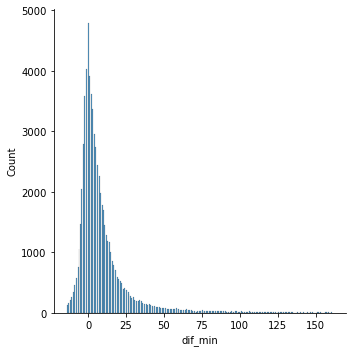

In [684]:
sns.displot(data= data, x= data["dif_min"])


In [685]:
#Creamos la variable dummie para luego poder calcular la probabilidad de que se atrase o no

In [686]:
data["Retraso_dummie"]= np.where(data["dif_min"]>0,1,0)

In [687]:
data.sample(5)

,Fecha-I,Ori-I,Fecha-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLADES,Cambio_Nvuelo,Cambio_destino,Cambio_aerolinea,Retraso,dif_min,Retraso_dummie
61876,2017-12-14 21:45:00,SCEL,2017-12-14 21:40:00,14,12,2017,Jueves,I,American Airlines,Miami,0,0,0,-1 days +23:55:00,-5.0,0
55306,2017-10-03 20:05:00,SCEL,2017-10-03 20:06:00,3,10,2017,Martes,I,Grupo LATAM,Buenos Aires,0,0,1,0 days 00:01:00,1.0,1
54008,2017-10-02 15:40:00,SCEL,2017-10-02 15:51:00,2,10,2017,Lunes,I,Grupo LATAM,Montevideo,0,0,0,0 days 00:11:00,11.0,1
61910,2017-12-18 22:30:00,SCEL,2017-12-18 22:25:00,18,12,2017,Lunes,I,American Airlines,Dallas,0,0,0,-1 days +23:55:00,-5.0,0
21224,2017-04-17 04:35:00,SCEL,2017-04-17 04:37:00,17,4,2017,Lunes,I,Grupo LATAM,Buenos Aires,0,0,0,0 days 00:02:00,2.0,1


In [688]:
data["Retraso_dummie"].value_counts()

1    45507
0    22699
Name: Retraso_dummie, dtype: int64

In [689]:
data["Adelanto_dummie"]= np.where(data["dif_min"]<0,1,0)

2) atraso_15

In [690]:
data["atraso_15"]= np.where(data["dif_min"]>15,1,0)

In [691]:
data["atraso_15"].value_counts()

0    55592
1    12614
Name: atraso_15, dtype: int64

In [692]:
data["AÑO"].value_counts()

2017    68204
2018        2
Name: AÑO, dtype: int64

3) temporada_alta

In [693]:
#Agrego temporada alta segun lo solicitado
#temporada_alta : 1 si Fecha-I está entre 15-Dic y 3-Mar, o 15-Jul y 31-Jul, o 11-Sep y 30-Sep, 0 si no
fecha1= pd.to_datetime('20161215', format='%Y%m%d')
fecha2= pd.to_datetime('20170303',format='%Y%m%d')
fecha3= pd.to_datetime('20170715',format='%Y%m%d')
fecha4= pd.to_datetime('20170731',format='%Y%m%d')
fecha5= pd.to_datetime('20170911',format='%Y%m%d')
fecha6= pd.to_datetime('20170930',format='%Y%m%d')
fecha7= pd.to_datetime('20171215', format='%Y%m%d')
fecha8= pd.to_datetime('20180303',format='%Y%m%d')


data["temporada_alta"] = np.where((data['Fecha-I']>= fecha1) & (data['Fecha-I']<= fecha2) |
                                  (data['Fecha-I']>= fecha3) & (data['Fecha-I']<= fecha4) |
                                  (data['Fecha-I']>= fecha5) & (data['Fecha-I']<= fecha6) |
                                  (data['Fecha-I']>= fecha7) & (data['Fecha-I']<= fecha8)
                                  ,1,0)

data["temporada_alta"].value_counts()

0    45995
1    22211
Name: temporada_alta, dtype: int64

In [694]:
data.iloc[63119]

Fecha-I             2017-12-15 06:10:00
Ori-I                              SCEL
Fecha-O             2017-12-15 06:22:00
DIA                                  15
MES                                  12
AÑO                                2017
DIANOM                          Viernes
TIPOVUELO                             N
OPERA                       Sky Airline
SIGLADES                   Punta Arenas
Cambio_Nvuelo                         0
Cambio_destino                        0
Cambio_aerolinea                      0
Retraso                 0 days 00:12:00
dif_min                              12
Retraso_dummie                        1
Adelanto_dummie                       0
atraso_15                             0
temporada_alta                        1
Name: 63119, dtype: object

In [695]:
data['Fecha-I'].iloc[896]

Timestamp('2017-01-04 13:50:00')

In [696]:
data['Hora'] = data['Fecha-I'].dt.hour

In [697]:
data['Hora'].sample(3)

61503    16
62772    13
56499     6
Name: Hora, dtype: int64

In [649]:
data.columns

Index(['Ori-I', 'DIA', 'MES', 'AÑO', 'DIANOM', 'TIPOVUELO', 'OPERA',
       'SIGLADES', 'Cambio_Nvuelo', 'Cambio_destino', 'Cambio_aerolinea',
       'dif_min', 'Retraso_dummie', 'atraso_15', 'temporada_alta', 'Hora'],
      dtype='object')

In [698]:
def period(row):
    if row['Hora'] >= 5 and row['Hora']< 12:
        return 'mañana'
    elif row['Hora'] >= 12 and row['Hora']<19:
        return 'tarde'
    else:
        return 'noche'

In [699]:
data['periodo_dia']= data.apply(lambda r: period(r), axis=1)

In [700]:
data.periodo_dia.value_counts()

tarde     25506
mañana    25352
noche     17348
Name: periodo_dia, dtype: int64

In [701]:
#Ahora que ya termine de utilizar la variable Fecha-I Dropeare Fecha-I Y Fecha-O y Retraso
data= data.drop(columns=['Fecha-I', 'Fecha-O', 'Retraso'])
data.sample(5)

,Ori-I,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLADES,Cambio_Nvuelo,Cambio_destino,Cambio_aerolinea,dif_min,Retraso_dummie,Adelanto_dummie,atraso_15,temporada_alta,Hora,periodo_dia
53311,SCEL,6,10,2017,Viernes,N,Grupo LATAM,Punta Arenas,0,0,1,-1.0,0,1,0,0,5,mañana
29415,SCEL,5,6,2017,Lunes,I,Sky Airline,Lima,0,0,0,0.0,0,0,0,0,14,tarde
25720,SCEL,20,5,2017,Sabado,N,Grupo LATAM,Copiapo,0,0,1,3.0,1,0,0,0,16,tarde
26742,SCEL,16,5,2017,Martes,I,Grupo LATAM,Ciudad de Mexico,0,0,0,15.0,1,0,0,0,22,noche
67286,SCEL,2,12,2017,Sabado,N,Grupo LATAM,Iquique,0,0,0,11.0,1,0,0,0,13,tarde


In [702]:
#Distribución de los datos

In [703]:
data['Ori-I'].value_counts()

SCEL    68206
Name: Ori-I, dtype: int64

## 1)¿Cómo se distribuyen los datos? ¿Qué te llama la atención o cuál es tu conclusión sobre esto?


In [704]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

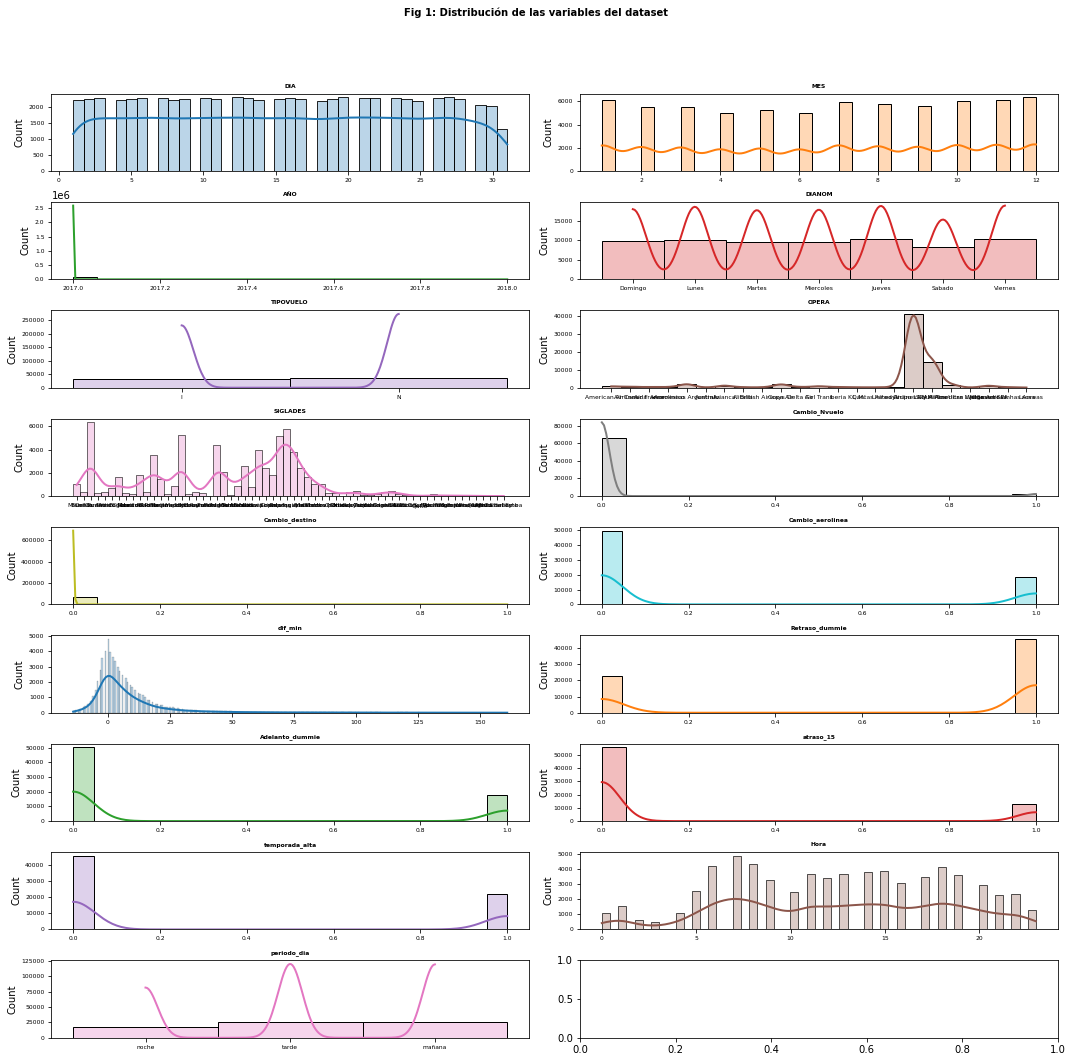

In [706]:
fig, axes = plt.subplots(nrows=9, ncols=2, figsize=(15, 15))
axes = axes.flat
data_plot = data.drop(columns=['Ori-I'])
columnas= data_plot.columns

for i, colum in enumerate(columnas):
    sns.histplot(
        data    = data_plot,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 6, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Fig 1: Distribución de las variables del dataset', fontsize = 10, fontweight = "bold");

In [707]:
data.Adelanto_dummie.value_counts()/data.shape[0]

0    0.737413
1    0.262587
Name: Adelanto_dummie, dtype: float64

In [708]:
data.Hora.value_counts()/data.shape[0]

7     0.071577
8     0.063968
6     0.061563
18    0.061021
15    0.056945
14    0.056241
13    0.053881
11    0.053778
19    0.052649
17    0.050802
12    0.050025
9     0.047855
16    0.045040
20    0.043031
5     0.036859
10    0.036097
22    0.034015
21    0.033897
1     0.023062
23    0.019016
4     0.016010
0     0.015864
2     0.009398
3     0.007404
Name: Hora, dtype: float64

In [712]:
(data.Adelanto_dummie.value_counts()/data.shape[0]).sort_values(ascending=False)

0    0.737413
1    0.262587
Name: Adelanto_dummie, dtype: float64

In [713]:
(data.periodo_dia.value_counts()/data.shape[0]).sort_values(ascending=False)

tarde     0.373955
mañana    0.371698
noche     0.254347
Name: periodo_dia, dtype: float64

In [714]:
(data.atraso_15.value_counts()/data.shape[0]).sort_values(ascending=False)

0    0.81506
1    0.18494
Name: atraso_15, dtype: float64

In [715]:
(data.temporada_alta.value_counts()/data.shape[0]).sort_values(ascending=False)

0    0.674354
1    0.325646
Name: temporada_alta, dtype: float64

In [716]:
(data.Retraso_dummie.value_counts()/data.shape[0]).sort_values(ascending=False)

1    0.667199
0    0.332801
Name: Retraso_dummie, dtype: float64

In [717]:
(data.TIPOVUELO.value_counts()/data.shape[0]).sort_values(ascending=False)

N    0.541976
I    0.458024
Name: TIPOVUELO, dtype: float64

In [718]:
(data.DIANOM.value_counts()/data.shape[0]).sort_values(ascending=False)

Viernes      0.150896
Jueves       0.150295
Lunes        0.148535
Domingo      0.143624
Miercoles    0.142539
Martes       0.141659
Sabado       0.122453
Name: DIANOM, dtype: float64

In [719]:
(data.DIA.value_counts()/data.shape[0]).sort_values(ascending=False)

20    0.033575
27    0.033516
12    0.033487
10    0.033472
6     0.033355
13    0.033311
22    0.033311
3     0.033296
16    0.033252
26    0.033238
21    0.033238
7     0.033194
23    0.033135
5     0.032856
15    0.032827
19    0.032812
11    0.032798
24    0.032724
28    0.032724
17    0.032666
9     0.032651
2     0.032592
14    0.032563
4     0.032475
8     0.032446
1     0.032373
25    0.031947
18    0.031669
29    0.029968
30    0.029616
31    0.018913
Name: DIA, dtype: float64

In [720]:
(data.OPERA.value_counts()/data.shape[0]).sort_values(ascending=False)

Grupo LATAM                 0.599537
Sky Airline                 0.209630
Aerolineas Argentinas       0.028575
Copa Air                    0.027124
Latin American Wings        0.024543
Avianca                     0.016890
JetSmart SPA                0.016054
Gol Trans                   0.011817
American Airlines           0.011099
Air Canada                  0.008284
Iberia                      0.005307
Air France                  0.005249
Delta Air                   0.005249
Aeromexico                  0.005146
United Airlines             0.004912
Oceanair Linhas Aereas      0.004091
Alitalia                    0.003797
K.L.M.                      0.003680
British Airways             0.003006
Qantas Airways              0.002859
Lacsa                       0.001349
Austral                     0.001085
Plus Ultra Lineas Aereas    0.000718
Name: OPERA, dtype: float64

In [721]:
(data.SIGLADES.value_counts()/data.shape[0]).sort_values(ascending=False)

Buenos Aires        0.092880
Antofagasta         0.084831
Lima                0.077266
Calama              0.075448
Puerto Montt        0.063880
                      ...   
Cataratas Iguacu    0.000029
Washington          0.000015
Puerto Stanley      0.000015
Pisco, Peru         0.000015
Cochabamba          0.000015
Name: SIGLADES, Length: 62, dtype: float64

In [722]:
data.columns

Index(['Ori-I', 'DIA', 'MES', 'AÑO', 'DIANOM', 'TIPOVUELO', 'OPERA',
       'SIGLADES', 'Cambio_Nvuelo', 'Cambio_destino', 'Cambio_aerolinea',
       'dif_min', 'Retraso_dummie', 'Adelanto_dummie', 'atraso_15',
       'temporada_alta', 'Hora', 'periodo_dia'],
      dtype='object')

 ¿Qué te llama la atención o cuál es tu conclusión sobre esto?  
    
-La distribucion de datos por mes, dia de semana, y dia del mes es similar, es decir la cantidad de vuelos no depende del mes dia o dia de semana.  
-Latam es la aerolinea con mayor participacion con aproximadamente 60% seguido por Skyairline con aproximadamente 21%-  
-Aproximadamente un 66%  del total de los vuelos sale atrasado de estos solo aproximadamente un 18% se retrasa mas de 15 minutos.  
-Aproximadamente un 26% de los vuelos sale adelantado y aproximadamente 66% sale atrasado, por tanto existe aproximadamente 
solo un 8% de vuelos que salen a tiempo.



In [723]:
data=data.drop(columns=['Adelanto_dummie'])

## 3. ¿Cómo se compone la tasa de atraso por destino, aerolínea, mes del año, día de la semana, temporada, tipo de vuelo?¿Qué variables esperarías que más influyeran en predecir atrasos?


Tasa de atraso por destino

In [724]:
data.groupby('SIGLADES').Retraso_dummie.mean().sort_values(ascending=False).head(10)

SIGLADES
Puerto Stanley    1.000000
Pisco, Peru       1.000000
Ushuia            1.000000
Quito             1.000000
Cochabamba        1.000000
Bariloche         1.000000
Melbourne         0.923077
Rosario           0.919118
Sydney            0.912371
Santa Cruz        0.900000
Name: Retraso_dummie, dtype: float64

In [725]:
data.groupby('SIGLADES').Retraso_dummie.mean().sort_values(ascending=False).tail(10)

SIGLADES
Cataratas Iguacu    0.500000
Punta del Este      0.500000
Ciudad de Mexico    0.451429
Paris               0.423398
Ciudad de Panama    0.370270
Curitiba, Bra.      0.333333
Atlanta             0.307263
Dallas              0.235294
Houston             0.203593
Washington          0.000000
Name: Retraso_dummie, dtype: float64

In [726]:
(data.groupby('SIGLADES').Retraso_dummie.mean()).mean()

0.6895093386176337

In [727]:
(data.groupby('SIGLADES').Retraso_dummie.mean()).std()

0.2058355004236715

-En el atraso segun destino podemos ver que los destinos que siempre se atrasan con una tasa de atraso mayor a 95% son Puerto Stanley "Pisco, Peru", Ushuia, Quito, Cochabamba, Bariloche.  
-El único destino que no se a atrasado nunca es Washington.  
-La tasa promedio de atraso por destino para el dataset es de 68,9%.   
-Es decir si clasificamos por destino el 69% de los destinos sale atrasado

Tasa de atraso segun aerolínea

In [728]:
data.groupby('OPERA').Retraso_dummie.mean().sort_values(ascending=False).head(10)

OPERA
Qantas Airways              0.912821
Plus Ultra Lineas Aereas    0.857143
Air Canada                  0.775221
Latin American Wings        0.749104
Grupo LATAM                 0.736868
Austral                     0.648649
British Airways             0.604878
Aerolineas Argentinas       0.591072
JetSmart SPA                0.590868
Sky Airline                 0.589593
Name: Retraso_dummie, dtype: float64

In [729]:
data.groupby('OPERA').Retraso_dummie.mean().sort_values(ascending=False).tail(10)

OPERA
Avianca                   0.572917
Oceanair Linhas Aereas    0.480287
Lacsa                     0.434783
Air France                0.421788
Copa Air                  0.370270
K.L.M.                    0.346614
Delta Air                 0.307263
American Airlines         0.284016
Aeromexico                0.222222
United Airlines           0.202985
Name: Retraso_dummie, dtype: float64

In [730]:
(data.groupby('OPERA').Retraso_dummie.mean()).mean()

0.5413597758108079

In [731]:
(data.groupby('OPERA').Retraso_dummie.mean()).std()

0.1950538562212911

-Qantas Airways, Plus Ultra Lineas Aereas, Air Canada, Latin American Wings, Grupo LATAM. Son los grupos que poseen un atraso de mas de un 70% de sus vuelos emitidos.  
-Aeromexico y United airlines presentan aproximadamente menos de un 25% de sus vuelos retrasados.  
-La tasa promedio de atraso por aerolinea del data set es de aproximadamente 54%.  

Tasa de atraso según mes

In [732]:
data.groupby('MES').Retraso_dummie.mean().sort_values(ascending=False)

MES
7     0.770027
12    0.741032
10    0.712865
11    0.692434
1     0.661755
2     0.652401
6     0.648464
8     0.647110
9     0.645455
5     0.641221
4     0.592430
3     0.565669
Name: Retraso_dummie, dtype: float64

In [733]:
(data.groupby('MES').Retraso_dummie.mean().sort_values(ascending=False)).std()

0.05775443670244032

In [734]:
(data.groupby('MES').Retraso_dummie.mean().sort_values(ascending=False)).mean()

0.6642386088647986

Los retrasos por mes, estos se distribuyen de manera similar con una desviación estandar de 0,05 y una tasa promedio de atraso por mes de un 66%

Tasa de retraso por día de semana

In [735]:
data.groupby('DIANOM').Retraso_dummie.mean().sort_values(ascending=False)

DIANOM
Viernes      0.717159
Jueves       0.683543
Lunes        0.675155
Miercoles    0.659947
Sabado       0.645953
Martes       0.642310
Domingo      0.639241
Name: Retraso_dummie, dtype: float64

In [736]:
data.groupby('DIANOM').Retraso_dummie.mean().sort_values(ascending=False).std()

0.028060599907687257

In [737]:
data.groupby('DIANOM').Retraso_dummie.mean().sort_values(ascending=False).mean()

0.6661868080096084

-Los retrasos por dia de semana se distribuyen de manera similar con una desviación estandar de 0,03 y una tasa promedio de atraso por mes de un 66%

Tasa de atraso temporada_alta

In [738]:
data.groupby('temporada_alta').Retraso_dummie.mean().sort_values(ascending=False)

temporada_alta
1    0.682455
0    0.659833
Name: Retraso_dummie, dtype: float64

In [739]:
data.groupby('temporada_alta').Retraso_dummie.mean().sort_values(ascending=False).std()

0.015996204318721632

In [740]:
data.groupby('temporada_alta').Retraso_dummie.mean().sort_values(ascending=False).mean()

0.6711436150459809

-Los retrasos por temporada se distribuyen de manera similar con una desviación estandar de 0,015 y una tasa promedio de atraso por mes de un 67%

Tasa de atraso segun tipo de vuelo

In [741]:
data.groupby('TIPOVUELO').Retraso_dummie.mean().sort_values(ascending=False)

TIPOVUELO
I    0.678521
N    0.657631
Name: Retraso_dummie, dtype: float64

In [742]:
data.groupby('TIPOVUELO').Retraso_dummie.mean().sort_values(ascending=False).std()

0.014771312065009127

In [743]:
data.groupby('TIPOVUELO').Retraso_dummie.mean().sort_values(ascending=False).mean()

0.6680762318323727

-Los retrasos según Tipo de vuelo se distribuyen de manera similar con una desviación estandar de 0,014 y una tasa promedio de atraso por mes de un 66%

¿Qué variables esperarías que más influyeran en predecir atrasos?  
-Al dividir por los distintos grupos, todos muestran una tasa de atraso mayor al 50%.  
-Según la información anterior podemos ver que en general las variables se distribuyen de forma similar en atrasos,EXCEPTO por el atraso segun destino std=0.2058 y el atraso segun OPERADOR std=0.195, por tanto espero que estas variables influyan más a la hora de predecir atrasos (difieren mucho el atraso segun tipo de operador y destino).


In [744]:
data.groupby('periodo_dia').Retraso_dummie.mean().sort_values(ascending=False)

periodo_dia
tarde     0.692465
mañana    0.660106
noche     0.640420
Name: Retraso_dummie, dtype: float64

In [745]:
data.groupby('periodo_dia').Retraso_dummie.mean().sort_values(ascending=False).mean()

0.6643299582164574

In [746]:
data.groupby('periodo_dia').Retraso_dummie.mean().sort_values(ascending=False).std()

0.026278325713135365

Los retrasos segun periodo del día se distribuyen de manera similar, con una tasa promedio de retraso de 0,66 y una desviacion estandar de 0.026

In [747]:
data.columns

Index(['Ori-I', 'DIA', 'MES', 'AÑO', 'DIANOM', 'TIPOVUELO', 'OPERA',
       'SIGLADES', 'Cambio_Nvuelo', 'Cambio_destino', 'Cambio_aerolinea',
       'dif_min', 'Retraso_dummie', 'atraso_15', 'temporada_alta', 'Hora',
       'periodo_dia'],
      dtype='object')

## 2. Genera las columnas adicionales y luego expórtelas en un archivo synthetic_features.csv 

In [748]:

columns=['atraso_15', 'temporada_alta', 'periodo_dia']
synthetic_features= data[columns]
synthetic_features.to_csv("synthetic_features.csv", sep="\t", header=True, index = False)

In [749]:
#Ahora voy a pasar las variables a categoricas a dummies
# DIANOM, para tener que dia de la semana fue, Tipo de vuelo,
#para tener separado que vuelo era, lo mismo con el día del mes, el mes y el año. (podria tener relación con los atrasos)
# 

In [750]:
data_ml= pd.get_dummies(data=data, columns= ['Ori-I', 'DIANOM', 'TIPOVUELO','DIA','MES','AÑO','OPERA','SIGLADES', 'Hora', 'periodo_dia'], drop_first= True)

In [752]:
data_ml.sample(5)

,Cambio_Nvuelo,Cambio_destino,Cambio_aerolinea,dif_min,Retraso_dummie,atraso_15,temporada_alta,DIANOM_Jueves,DIANOM_Lunes,DIANOM_Martes,...,Hora_16,Hora_17,Hora_18,Hora_19,Hora_20,Hora_21,Hora_22,Hora_23,periodo_dia_noche,periodo_dia_tarde
18510,0,0,0,-5.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8383,0,0,0,1.0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
15186,0,0,1,19.0,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
57226,0,0,0,0.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
30447,0,0,1,15.0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [753]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Grafico las correlaciones de las variables con el target

<AxesSubplot:>

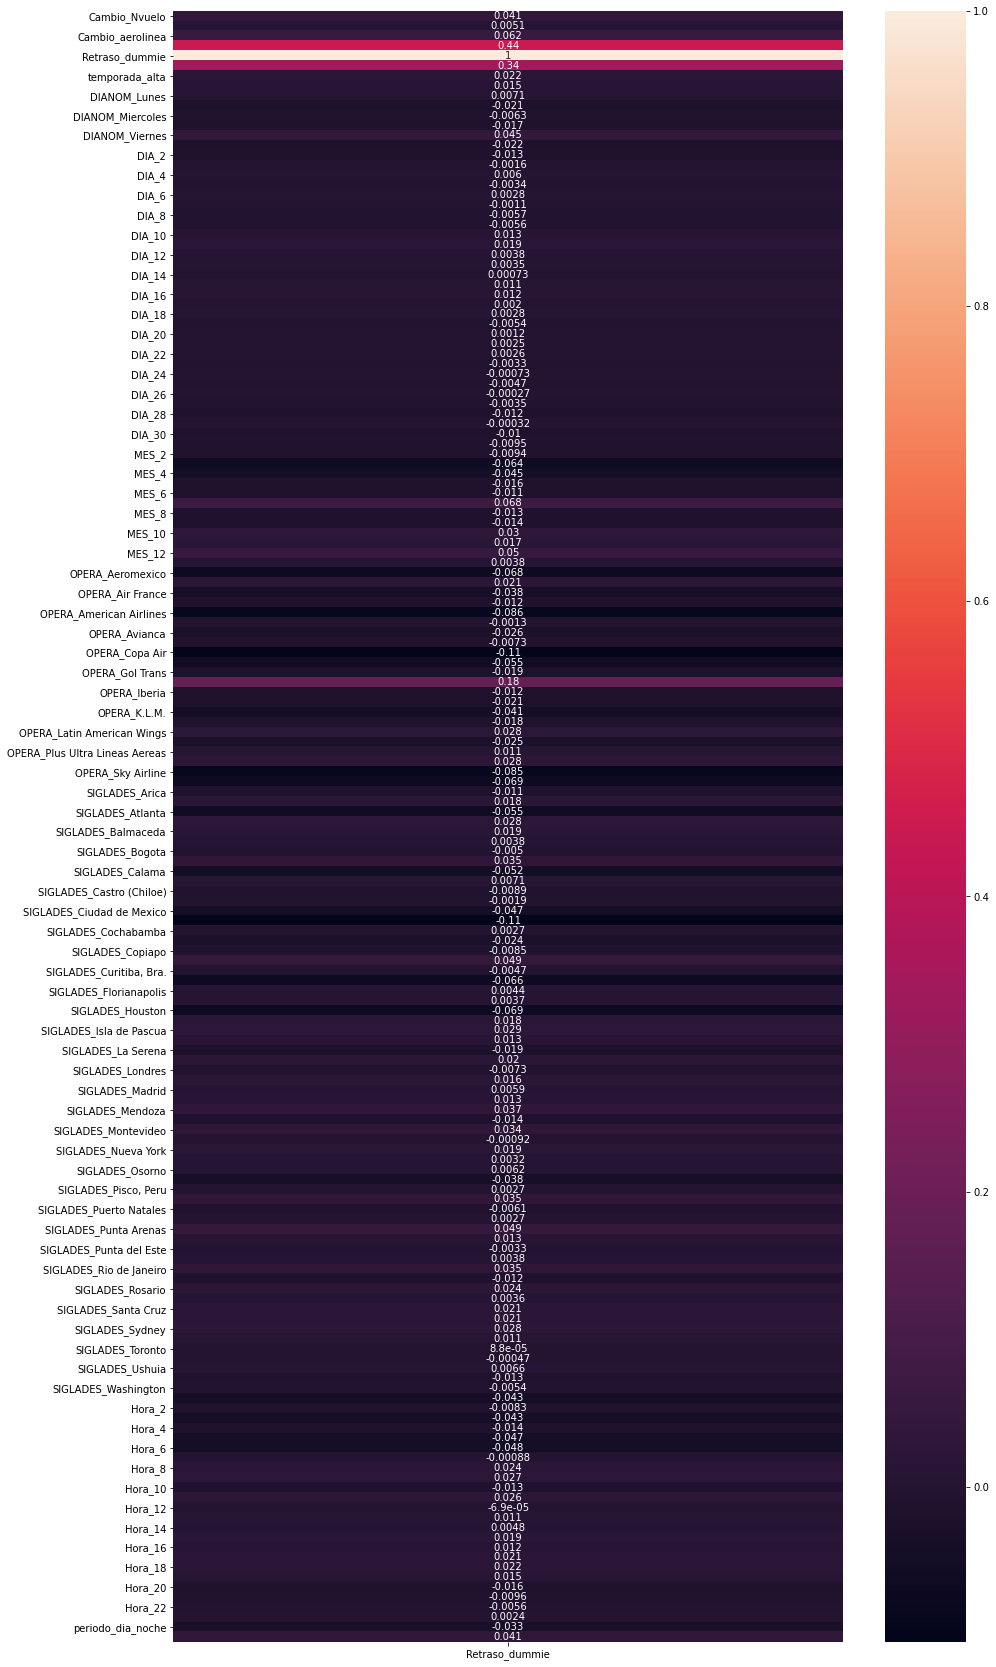

In [754]:
plt.figure(figsize=(15,30))
sns.heatmap(data_ml.corr()[['Retraso_dummie']], annot=True)

## 4)Entrena uno o varios modelos (usando el/los algoritmo(s) que prefieras) para estimar la probabilidad de atraso de un vuelo.Siéntete libre de generar variables adicionales y/o complementar con variables externas.

In [755]:
data_ml.columns

Index(['Cambio_Nvuelo', 'Cambio_destino', 'Cambio_aerolinea', 'dif_min',
       'Retraso_dummie', 'atraso_15', 'temporada_alta', 'DIANOM_Jueves',
       'DIANOM_Lunes', 'DIANOM_Martes',
       ...
       'Hora_16', 'Hora_17', 'Hora_18', 'Hora_19', 'Hora_20', 'Hora_21',
       'Hora_22', 'Hora_23', 'periodo_dia_noche', 'periodo_dia_tarde'],
      dtype='object', length=164)

In [756]:
data_ml.describe()

,Cambio_Nvuelo,Cambio_destino,Cambio_aerolinea,dif_min,Retraso_dummie,atraso_15,temporada_alta,DIANOM_Jueves,DIANOM_Lunes,DIANOM_Martes,...,Hora_16,Hora_17,Hora_18,Hora_19,Hora_20,Hora_21,Hora_22,Hora_23,periodo_dia_noche,periodo_dia_tarde
count,68206.000000,68206.000000,68206.000000,68206.000000,68206.000000,68206.000000,68206.000000,68206.000000,68206.000000,68206.000000,...,68206.000000,68206.000000,68206.000000,68206.000000,68206.000000,68206.000000,68206.000000,68206.000000,68206.000000,68206.000000
mean,0.027124,0.000411,0.273715,9.110855,0.667199,0.184940,0.325646,0.150295,0.148535,0.141659,...,0.045040,0.050802,0.061021,0.052649,0.043031,0.033897,0.034015,0.019016,0.254347,0.373955
std,0.162445,0.020257,0.445868,19.313387,0.471219,0.388252,0.468619,0.357363,0.355632,0.348703,...,0.207393,0.219595,0.239371,0.223334,0.202929,0.180966,0.181268,0.136582,0.435497,0.483856
min,0.000000,0.000000,0.000000,-14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,12.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,161.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [757]:
#  para poder predecir, tengo que sacar las variables que dicen que ya esta atrasado,
#dropear: dif_min y atraso_15

In [758]:
data_ml= data_ml.drop(columns=['dif_min','atraso_15'])

In [759]:
data_ml.columns
data_ml.shape

(68206, 162)

Creo modelo

In [760]:
X = data_ml.drop(columns=['Retraso_dummie'])
y = data_ml['Retraso_dummie']

In [761]:
# Separamos un set de testeo para evaluar el modelo
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, random_state = 123)

In [762]:
# Verificamos que coincidan las proporciones del target
y_train.mean(), y_test.mean()

(0.6672010008992454, 0.6671944639924936)

In [763]:
# Estandarizamos los datos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

Modelo 1: Regresión Logistica

In [764]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
fit1= lr.fit(X_train_std, y_train)

In [765]:
print(lr.coef_)
print(lr.intercept_)

[[ 3.25630035e-02  2.03519461e-03  2.08755120e-03  4.81172414e-03
   1.08782928e-01  8.81206987e-02  3.19780801e-02  5.19013842e-02
   1.48768153e-02  1.58229337e-01 -2.33528399e-01 -2.23479040e-02
   2.29133163e-03  1.88376473e-02 -3.71986827e-03 -2.16688994e-03
   5.32725989e-03 -4.88099556e-03 -7.21416700e-03  4.14608965e-02
   5.17991094e-02  2.23837750e-02 -4.72827259e-03  7.32524456e-03
   3.79282256e-02  3.75795604e-02  6.27440267e-04  1.57561305e-02
   1.04033202e-03 -2.35771865e-03  1.11144001e-02  2.25121382e-02
  -5.63032049e-03 -3.22509545e-03 -1.02693573e-02  1.08603784e-02
  -8.23511007e-03 -1.42348078e-02  2.32282393e-03 -1.69518569e-02
  -2.03577755e-02 -6.89769238e-03 -1.13721317e-01 -6.34475840e-02
  -5.77706022e-03 -6.26220482e-03  1.81371564e-01 -6.02327611e-03
  -6.74393180e-03  9.62033034e-02  5.65073320e-02  1.28992918e-01
   6.88052123e-02 -4.53636090e-02  1.57973194e-01 -1.52716773e-01
   1.23289508e-02 -9.69786727e-02 -2.39771036e-03  7.67739939e-02
   1.22414

In [766]:
print("Intercept:", lr.intercept_)
print("Coeficiente:", list(zip(X.columns, lr.coef_.flatten(), )))

Intercept: [0.77628649]
Coeficiente: [('Cambio_Nvuelo', 0.03256300347368488), ('Cambio_destino', 0.0020351946111403663), ('Cambio_aerolinea', 0.0020875511960828643), ('temporada_alta', 0.004811724135329745), ('DIANOM_Jueves', 0.1087829283493443), ('DIANOM_Lunes', 0.08812069870983598), ('DIANOM_Martes', 0.031978080112875513), ('DIANOM_Miercoles', 0.05190138418744224), ('DIANOM_Sabado', 0.014876815319568698), ('DIANOM_Viernes', 0.15822933740669412), ('TIPOVUELO_N', -0.2335283990567965), ('DIA_2', -0.02234790398183794), ('DIA_3', 0.002291331633654806), ('DIA_4', 0.01883764726866353), ('DIA_5', -0.003719868272722103), ('DIA_6', -0.0021668899381584615), ('DIA_7', 0.005327259887367473), ('DIA_8', -0.004880995557961368), ('DIA_9', -0.0072141670014020404), ('DIA_10', 0.04146089651328727), ('DIA_11', 0.05179910942522959), ('DIA_12', 0.02238377501862266), ('DIA_13', -0.004728272587471027), ('DIA_14', 0.007325244555298982), ('DIA_15', 0.03792822557310302), ('DIA_16', 0.03757956035397299), ('DIA_1

In [767]:
numpy=list(zip(X.columns, lr.coef_.flatten(), ))

In [768]:
df_lr=pd.DataFrame( data=numpy)
df_lr.sample(3)

,0,1
126,"SIGLADES_San Juan, Arg.",-0.007646
120,SIGLADES_Punta Cana,0.025668
23,DIA_14,0.007325


In [769]:
df_lr.sort_values(by= 1, ascending=False)

,0,1
64,OPERA_Grupo LATAM,0.622174
73,OPERA_Sky Airline,0.262772
69,OPERA_Latin American Wings,0.235198
119,SIGLADES_Punta Arenas,0.193504
46,MES_7,0.181372
...,...,...
57,OPERA_American Airlines,-0.096979
42,MES_3,-0.113721
159,periodo_dia_noche,-0.136672
55,OPERA_Air France,-0.152717


In [770]:
y_train_pred = lr.predict(X_train_std)
y_test_pred = lr.predict(X_test_std)

Probabilidad de que se atrase el vuelo

In [771]:
y_test_proba= lr.predict_proba(X_test_std)
y_test_proba

array([[0.4395558 , 0.5604442 ],
       [0.33909431, 0.66090569],
       [0.13001286, 0.86998714],
       ...,
       [0.59091784, 0.40908216],
       [0.27392574, 0.72607426],
       [0.16517323, 0.83482677]])

## Evalúa tu modelo. ¿Qué performance tiene? ¿Qué métricas usaste para evaluar esa performance y por qué? ¿Por qué elegiste ese algoritmo en particular? ¿Qué variables son las que más influyen en la predicción? ¿Cómo podrías mejorar la performance?

In [772]:
# Elaboramos la matriz de confusión

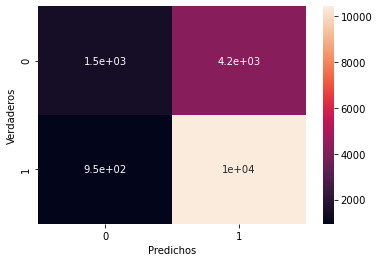

In [773]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_test_pred)
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True)
plt.ylabel('Verdaderos')
plt.xlabel('Predichos');

In [774]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_test_pred)

0.6985104386582219

 performance= 0,6985 
- Qué métricas usaste para evaluar esa performance y por qué, ¿Por qué?  
Para evaluar la perfomance use el accuracy score, ya que esta muestra la proporción de casos correctamente clasificados de los datos de test sobre el total de casos de test. 
-  ¿Por qué elegiste ese algoritmo en particular?  
El modelo de Regresión Logística es muy útil para abordar problemas de clasificación. Es un modelo muy versátil ya que puede ayudarnos a estimar las probabilidades de pertenecer a distintas categorías (lo solicitado en este caso), y también poder interpretar la influencia de muchas variables de entrada sobre la probabilidad de pertenecer a cada categoría.
-  ¿Qué variables son las que más influyen en la predicción?  
Son aquellas con mayor coeficiente de intersección. En este caso sería OPERA_ Grupo Latam, 0.584, OPERA_Sky Airline 0.2353,
aportando positivamente en atraso y TIPOVUELO_N -0.22 (nacional) , OPERA Air_france -0.15 aportando negativamente en atraso
-  ¿Cómo podrías mejorar la performance?  
Podría mejorar la perfomance realizando una regularización o con GridSearch para mejorar los hiperparametros


Modelo 2: Naive Bayes

In [775]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

fit2=gnb.fit(X_train, y_train)

In [776]:
Y_pred_GNB = gnb.predict(X_test)

In [777]:
gnb.predict_proba(X_test)

array([[1.00000000e+00, 7.55166517e-19],
       [1.00000000e+00, 1.18442804e-18],
       [1.25749829e-06, 9.99998743e-01],
       ...,
       [1.00000000e+00, 1.75163653e-20],
       [1.00000000e+00, 3.86093414e-17],
       [1.00000000e+00, 4.16548286e-15]])

In [778]:
(accuracy_score(y_test, Y_pred_GNB))

0.37197982641332394

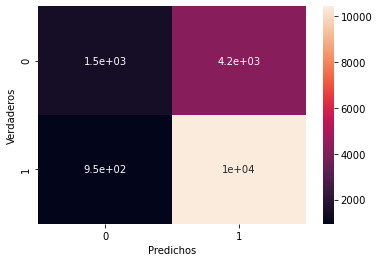

In [779]:
confusion_matrix(y_test, y_test_pred)
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True)
plt.ylabel('Verdaderos')
plt.xlabel('Predichos');

Evalúa tu modelo.
-  ¿Qué performance tiene? 0.37
-  ¿Qué métricas usaste para evaluar esa performance y por qué? 
Para evaluar la perfomance use el accuracy score, ya que esta muestra la proporción de casos correctamente clasificados de los datos de test sobre el total de casos de test.
-  ¿Por qué elegiste ese algoritmo en particular? 
 Naive Bayes nos permite, dado un conjunto de características, predecir una clase usando la probabilidad. Es relativamente simple de entender y construir . No es sensible a características irrelevantes. Su principal desventaja es que asume que cada característica es independiente, lo cual no siempre sucede.
 Dado que Naive Bayes es tan fácil de optimizar y tan rápido desde el punto de vista computacional, es un buen "baseline" para un problema de clasificación. Si performa bien, podemos quedarnos con este modelo y si necesitamos mejorar la precisión, tenemos una línea de base sobre la cual mejorar. En este caso no performo bien ya que dio un accuracy de 0.37
-  ¿Cómo podrías mejorar la performance?¶
Podría mejorar la perfomance haciendo un ensamble con el modelo de regresion logistica.

Modelo KNN  
Intente realizar el modelo KNN, pero fue muy pesado para mi computador y nunca termino de ejecutar.

In [780]:
#from sklearn.neighbors import KNeighborsClassifier

In [781]:
#from sklearn.model_selection import cross_val_score, KFold
#from sklearn.neighbors import KNeighborsClassifier

In [782]:
#def scores_knn(X, y, start,stop,step):
    
    # Vamos a querer graficar los distintos valores del score de cross validation en función del hiperparámetro n_neighbors
    # Para esto vamos a generar una lista de diccionarios que después se puede convertir fácilmente en DataFrame
    
    # Lista de diccionarios - la inicializamos vacío y por fuera del for loop para ir alimentándola en cada iteración
#    scores_para_df = []
    
    
#    for i in range(start,stop,step):
        
        # En cada iteración, instanciamos el modelo con un hiperparámetro distinto
#        model = KNeighborsClassifier(n_neighbors=i)

        # cross_val_scores nos devuelve un array de 5 resultados, uno por cada partición que hizo automáticamente CV
#        kf = KFold(n_splits=5, shuffle=True, random_state=10)
#        cv_scores = cross_val_score(model, X, y, cv=kf)

        # Para cada valor de n_neighbours, creamos un diccionario con el valor de n_neighbours y la media y el desvío de los scores
#        dict_row_score = {'score_medio':np.mean(cv_scores),'score_std':np.std(cv_scores),'n_neighbours':i}

        # Guardamos cada uno en la lista de diccionarios
#        scores_para_df.append(dict_row_score)
    
    # Creamos el DF a partir de la lista de resultados
#    df_scores = pd.DataFrame(scores_para_df)
    
    # Incorporamos los límites inferior y superior, restando y sumando el valor del desvío estándar, respectivamente
#    df_scores['limite_inferior'] = df_scores['score_medio'] - df_scores['score_std']
#    df_scores['limite_superior'] = df_scores['score_medio'] + df_scores['score_std']
    
    # Retornamos el DF
#    return df_scores

In [783]:
# Probamos de 1 a 20 vecinos
#df_scores= scores_knn(X_train_std, y_train, 1, 10, 1)

In [784]:
#best_k = df_scores.loc[df_scores.score_medio == df_scores.score_medio.max(),'n_neighbours'].values[0]
#best_k

In [785]:

#model_knn = KNeighborsClassifier()

#Lo ajustamos sobre datos de entrenamiento
#fit4= model_knn.fit(X_train_std, y_train)

In [786]:
# Lo utilizamos para predecir en test
#y_pred_knn = model_knn.predict(X_test_std)

In [787]:
# Computamos el accuracy score en test
#accuracy_score(y_test, y_pred_knn)

In [788]:
#sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='.0f')
#plt.ylabel('Etiquetas reales')
#plt.xlabel('Etiquetas predichas');

Lo mismo con GRIDSEARCH. Quise utilizar gridsearch para mejorar la performance de los modelos pero no pude ejecutarla por la cantidad de data.

In [789]:
#Aplicación de GRIDSEARCH

In [790]:
#from sklearn.model_selection import GridSearchCV, train_test_split

In [791]:
#models = [LogisticRegression(),
#          KNeighborsClassifier()]

In [792]:
#params = [
#    {'C': [1, 10, 100, 1000],
#     'penalty': ['l1', 'l2',],
#     'solver': ['saga']},
#    {'n_neighbors': range(1,15),
#     'weights' : ['uniform', 'distance'],
#     'p' : [1, 2, 3]}
#]

In [793]:
#from sklearn.model_selection import StratifiedKFold
#folds=StratifiedKFold(n_splits=10, random_state=19, shuffle=True)

In [794]:
#grids = []
#for i in range(len(models)):
#    gs = GridSearchCV(estimator=models[i], param_grid=params[i], scoring='accuracy', cv=folds, n_jobs=4)
#    print (gs)
#    fit = gs.fit(X_train_std, y_train)
#    grids.append(fit)

In [795]:
#for i in grids:
#    print (i.best_score_)
#    print (i.best_estimator_)
#    print (i.best_params_)

In [796]:
#pd.DataFrame(grids[0].cv_results_)

In [797]:
#pd.DataFrame(grids[1].cv_results_)

In [798]:
#X_test = scaler.transform(X_test)
#X_test = scaler.transform(X_test)
#y_preds_log = grids[0].predict(X_test)
#y_preds_knn = grids[1].predict(X_test)

In [799]:
#print (classification_report(y_test, y_preds_log))

In [800]:
#confusion_matrix(y_test, y_preds_log)

In [801]:
#print (classification_report(y_test, y_preds_knn)

In [802]:
#confusion_matrix(y_test, y_preds_knn)

Modelo 3: CART

In [803]:
from sklearn import tree

In [804]:
tr = tree.DecisionTreeClassifier(random_state=17)
fit3= tr.fit(X_train_std, y_train)

In [805]:
tr.feature_importances_

array([2.49672745e-03, 7.92991519e-05, 1.72052529e-02, 2.09130267e-02,
       1.38108889e-02, 1.28972326e-02, 1.37376503e-02, 1.59694478e-02,
       1.39593600e-02, 1.19825017e-02, 1.23031487e-02, 1.28496796e-02,
       1.26435137e-02, 1.22779534e-02, 1.28283650e-02, 1.24830388e-02,
       1.19830439e-02, 1.51853561e-02, 1.38800112e-02, 1.13859336e-02,
       1.13756075e-02, 1.19450932e-02, 1.33908752e-02, 1.25131607e-02,
       1.35374507e-02, 1.37080390e-02, 1.25021241e-02, 1.21725458e-02,
       1.39793296e-02, 1.29349127e-02, 1.23514699e-02, 1.56709016e-02,
       1.29376051e-02, 1.31219494e-02, 1.10709270e-02, 1.26041637e-02,
       1.24688362e-02, 1.17100320e-02, 1.29004332e-02, 1.32175249e-02,
       8.75462092e-03, 1.27887418e-02, 1.06353101e-02, 1.13328291e-02,
       1.00277362e-02, 8.42575029e-03, 8.12824663e-03, 1.11855776e-02,
       1.26503769e-02, 9.58567667e-03, 1.12771443e-02, 1.18485245e-02,
       3.39612591e-05, 3.74213436e-04, 4.14064666e-03, 8.35536763e-04,
      

In [806]:
y_pred_test_tree = tr.predict(X_test_std)

In [807]:
confusion_matrix(y_test, y_pred_test_tree)

array([[2613, 3062],
       [3063, 8314]], dtype=int64)

In [808]:
accuracy_score(y_test, y_pred_test_tree)

0.6408045977011494

Evalúa tu modelo.
-  ¿Qué performance tiene? 0.64
Lo que no es bueno, ya que solo considerando la distribución de la variable atraso, podría decir que un 66% se atrasa. Este accuracy es peor que esa base.
-  ¿Qué métricas usaste para evaluar esa performance y por qué? 
Para evaluar la perfomance use el accuracy score, ya que esta muestra la proporción de casos correctamente clasificados de los datos de test sobre el total de casos de test.
-  ¿Por qué elegiste ese algoritmo en particular? 
Lo utilice para despues poder hacer modelos de ensamble y ver si se podría mejorar la performance.  En general los modelos CART no tienen el mismo nivel de precisión en la predicción comparados con otros enfoques para regresión y clasificación vistos previamente.
-  ¿Cómo podrías mejorar la performance?¶
 Podría mejorar la perfomance haciendo un ensamble con los dos modelos anteriores

In [809]:
from scipy.stats import mode

In [810]:
def predict_ensamble(X, model_1, model_2, model_3):
    y_pred_1 = lr.predict(X)
    y_pred_2 = gnb.predict(X)
    y_pred_3 = tr.predict(X)
    result_mode = mode([y_test_pred, Y_pred_GNB, y_pred_test_tree]).mode
    result = np.transpose(result_mode)    
    return result

In [811]:
predict_cat_ensemble = predict_ensamble(X_test_std, fit1, fit2, fit3)
accuracy_ensemble = accuracy_score(y_test, predict_cat_ensemble)
print(accuracy_ensemble)
predict_cat_ensemble.shape
conf_mat_ensemble = confusion_matrix(y_test, predict_cat_ensemble)
print(conf_mat_ensemble)

0.6480178278207834
[[3065 2610]
 [3392 7985]]


In [812]:
def predict_ensamble(X, model_1, model_3):
    y_pred_1 = lr.predict(X)
    y_pred_3 = tr.predict(X)
    result_mode = mode([y_test_pred, y_pred_test_tree]).mode
    result = np.transpose(result_mode)    
    return result

In [813]:
predict_cat_ensemble = predict_ensamble(X_test_std, fit1, fit3)
accuracy_ensemble = accuracy_score(y_test, predict_cat_ensemble)
print(accuracy_ensemble)
predict_cat_ensemble.shape
conf_mat_ensemble = confusion_matrix(y_test, predict_cat_ensemble)
print(conf_mat_ensemble)

0.6437954492141684
[[3120 2555]
 [3519 7858]]


In [814]:
def predict_ensamble(X, model_1, model_2):
    y_pred_1 = lr.predict(X)
    y_pred_2 = gnb.predict(X)
    result_mode = mode([y_test_pred, Y_pred_GNB]).mode
    result = np.transpose(result_mode)    
    return result

In [815]:
predict_cat_ensemble = predict_ensamble(X_test_std, fit1, fit2)
accuracy_ensemble = accuracy_score(y_test, predict_cat_ensemble)
print(accuracy_ensemble)
predict_cat_ensemble.shape
conf_mat_ensemble = confusion_matrix(y_test, predict_cat_ensemble)
print(conf_mat_ensemble)

0.37197982641332394
[[ 5466   209]
 [10500   877]]


In [816]:
def predict_ensamble(X, model_2, model_3):
    y_pred_2 = gnb.predict(X)
    y_pred_3 = tr.predict(X)
    result_mode = mode([Y_pred_GNB, y_pred_test_tree]).mode
    result = np.transpose(result_mode)    
    return result

In [817]:
predict_cat_ensemble = predict_ensamble(X_test_std, fit2, fit3)
accuracy_ensemble = accuracy_score(y_test, predict_cat_ensemble)
print(accuracy_ensemble)
predict_cat_ensemble.shape
conf_mat_ensemble = confusion_matrix(y_test, predict_cat_ensemble)
print(conf_mat_ensemble)

0.3677574478067089
[[ 5521   154]
 [10627   750]]


Realizar ensamble no mejora la perfomance del modelo. El mejor modelo para este caso sería la regresión logistica con un 0,69 de accuracy. Gridsearch podría ayudar a mejorar estos valores. También probar ensamble con KNN 